# Land-surface practicals

# Introduction

In this practical, the stand-alone offline version of the ECMWF land-surface model, ECLand, will be used to gain understanding on surface processes and their interactions. In the exercises, ECLand runs on single points ("sites") using reanalysis forcing data. This configuration is particularly useful for process understanding, code development and parameter sensitivities, before moving to more complicated (and computationally expensive) 2D or 3D coupled simulations.

To run in stand-alone mode on sites, ecLand requires:
- a file containing the initial conditions for the model prognostic variables (called `surfinit*.nc`)
- a file containing the static information on the site to run, e.g. fraction of low/high vegetation, soil type etc. (called `surfclim*.nc`)
- a file containing the time-varying atmospheric forcing variables, e.g. wind speed, surface pressure, air temperature, solar radiation etc. (called `met_era5HT*.nc`)

Exercise 1 will focus on cold processes and the impact of snow on the surface energy balance and coupling between the soil and the atmosphere. Exercise 2 focusses on warm processes and how vegetation affects surface energy and water fluxes.


### The content of the SURF directory

- `ecland_practicals.ipynb` : this notebook

- `ecland_run_practicals.sh` : a script that include basic configuration variables to run ECLand on selected sites.

- `ecland_input_practicals/` : initial condition, static fields and meteorological forcing used as input to run ECLand in stand-alone mode

- `*.py` : python scripts for plotting and visualising data produced.

- `clean.sh` : start from clean directory: clean all plots, created initial condition and forcing files, output directories.


### Setup for practicals
This document assumes that you have already correctly installed ecLand and run the acceptance tests provided.

Edit the script `ecland_run_practicals.sh`:
- Open the script using a text editor;
- If you running this practical from your local machine, edit the script, setting the correct environment variables listed at the beginning of the script. E.g. adding the folder containing the path to the ecLand binaries to the `$PATH` ; comment out the `module load ...` commands 

Open the jupyter notebook `ecland_practicals.ipynb`

You are ready to start.


# I.	Impact of the presence of Snow

In cold situation the presence of snow and its compaction state (expressed by the snow density, kg m<sup>-3</sup>) have large impact on the 
evolution of the surface and near-surface atmosphere. In this exercise we make use of a cold case in Cabauw to examine the effect 
of snow presence on the surface energy budget and on the predicted temperatures' minima. Cabauw is a well-instrumented site in the Netherlands characterized by short grass. 
The case is extracted from ERA5 data, for 2022-01-19 12UTC to 2022-01-20 12UTC; the forcing is close to a clear-sky night, to represent a  situation to focus on the impact of surface properties.

In this exercise, we will run ECLand considering 4 situations:

1) No snow on the ground.

2) A freshly deposited snowpack of Snow Water Equivalent (SWE) of 50 kg m<sup>-2 </sup> and a density ρ<sub>sn</sub> = 100 kg m<sup>-3</sup>

3) A more compacted snowpack of the same SWE of 50 kg m<sup>-2</sup> but with density  ρ<sub>sn</sub> = 300 kg m<sup>-3</sup> 

4) (if time allows) Assess the effect of wind on the surface energy balance during nighttime 

### Run ECLand for selected experiments 

#### 1. No snow on the ground 

This case will be used as control experiment. The script ecland_run.sh is already configured to run this case. 

You can execute the script in this jupyter notebook (select "terminal" from the "new launcher" button), or within a cell in this Notebook by putting the "!" character at the front of the line:

`!./ecland_run_practicals.sh "CA-001" > stdout.log`
Where `CA-001` is the experiment ID for you experiment. <b> The control experiment is set up in order to use this id, so please don't change it.</b>
The `> stdout.log` syntax redirects the standard output to the text file stdout.log; this avoid a large amount of prints to be displayed in the cell. You can explore the details of the run by opening on a new tab or in a terminal window the "stdout.log" file.

If the scripts runs successfully, you should see something similar to the text below in the cell output:\
<font size="1">EC_MEMINFO@RNSORT: MINCID, MAXCID, NUMNODES =  0 3 1 </font> \
<font size="1">EC_MEMINFO                           | TC    | MEMORY USED(MB) | MEMORY FREE(MB) INCLUDING CACHED|  %USED %HUGE  | Energy  Power LoadAvg </font> \
<font size="1">EC_MEMINFO                           | Malloc| Inc Heap        | Numa region  0 |                |               |    (J)    (W) </font> \
<font size="1">EC_MEMINFO Node Name                 | Heap  | RSS(sum)        | Small  Huge or | Total          |</font> \
<font size="1">EC_MEMINFO                           | (sum) | Small    Huge   |  Only   Small  | Memfree+Cached |</font> \
<font size="1">EC_MEMINFO    0 traininglab05              0      38       0       349      16       796    4841      0.7   0.0         0      0    0.09  Sm/p:ec_mpi_finalize:mpl_end </font> \
<font size="1">EC_MEMINFO </font> \
<font size="1">EC_MEMINFO </font> \
<font size="1">EC_MEMINFO  Total energy consumed :        0.000 kWh (0 J)</font> \
<font size="1">EC_MEMINFO  Avg. power / node     : 0 W across 1 nodes</font> \
<font size="1">EC_MEMINFO </font> \
<font size="1">EC_MEMINFO </font> \
<font size="1">EC_MEMINFO Detailed memory information for program ecland-master -- wall-time :      0.001s</font> \
<font size="1">EC_MEMINFO Running on 1 nodes (1-numa) with 1 compute + 0 I/O-tasks and 4+0 threads at 09:45:12.370 on 07-Nov-2023</font> \
<font size="1">EC_MEMINFO The Job Name is  and the Job ID is </font> \
<font size="1">EC_MEMINFO </font> 


<b> Run ecLand for control experiment, CA-001 </b>

In [ ]:
!./ecland_run_practicals.sh "CA-001" > stdout.log

#### 2. Freshly deposited snow

In this idealised experiment the effect of freshly deposited snow is simulated by modifying the initial conditions data. 

The initial condition netCDF file for the control experiment is the following file:

`ecland_input_practicals/clim/LS-PRACTICALS/surfinit_CA-001_2022-2022.nc`

"CA-001" in the filename identifies the experiment ID. We are going to use this convention for all experiments `CA-00<N>`, with `N=1,2,3...` 

We can edit the file easily and add snow in the initial conditions using xarray (see below). We want to create a new initial condition file with a new experiment name `surfinit_CA-002_2022-2022.nc` containing snow in it.

The file containing the static fields information for the control experiment is the following: `ecland_input/clim/LS-PRACTICALS/surfclim_CA-001_2022-2022.nc`; the file containing the meteorological forcing fields is the following: `ecland_input_practicals/forcing/LS-PRACTICALS/met_era5HT_CA-001_2022-2022.nc`

In [2]:
import xarray as xr

# Open original initial condition file
ds_noSnow=xr.open_dataset('ecland_input_practicals/clim/LS-PRACTICALS/surfinit_CA-001_2022-2022.nc')
# check netCDF file content
ds_noSnow

<xarray.Dataset>
Dimensions:    (lat: 1, lon: 1, nlevs: 4, ntiles: 9, nvtiles: 2, month: 12,
                time: 1)
Coordinates:
  * lat        (lat) float64 51.97
  * lon        (lon) float64 4.927
  * nlevs      (nlevs) float64 0.035 0.175 0.64 1.945
  * ntiles     (ntiles) int32 1 2 3 4 5 6 7 8 9
  * nvtiles    (nvtiles) int32 1 2
  * month      (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) timedelta64[ns] 00:00:00
Data variables: (12/17)
    step       (time) int32 ...
    CanopInt   (lat, lon) float64 ...
    SoilTemp   (nlevs, lat, lon) float64 ...
    SoilMoist  (nlevs, lat, lon) float64 ...
    icetemp    (nlevs, lat, lon) float64 ...
    SWE        (lat, lon) float64 ...
    ...         ...
    TLMNW      (lat, lon) float64 ...
    TLWML      (lat, lon) float64 ...
    TLBOT      (lat, lon) float64 ...
    TLSF       (lat, lon) float64 ...
    HLICE      (lat, lon) float64 ...
    HLML       (lat, lon) float64 ...
Attributes:
    modelID:             ECLand            
    versionID:           cy48r1                 
    start_day:           20040101
    start_hour:          0
    SurfSgn_convention:  Mathematical
    history:             Thu Oct 26 14:02:25 2023: ncrename -d y,lat surfinit...
    NCO:                 netCDF Operators version 4.9.7 (Homepage = http://nc...

In [3]:
# Print original SWE (Snow Water Equivalent) and snow density in the file:
print(f'SWE in original initial conditions: {ds_noSnow["SWE"].data[0][0]}')
print(f'Snow density in original initial conditions: {ds_noSnow["snowdens"].data[0][0]}')


SWE in original initial conditions: 0.0
Snow density in original initial conditions: 100.0


In [4]:
# Modify SWE (Snow Water Equivalent) to have snow in the initial conditions:
ds_newSnow=ds_noSnow.copy(deep=True) # create a deep copy
new_snow_amount=50.0   # in kg m-2
ds_newSnow['SWE'][0,0] = new_snow_amount 

print(f'SWE in new initial condition file: {ds_newSnow["SWE"].data[0][0]}')

# Write new initial condition file, changing the experiment name:
EXP_NAME='CA-002'
ds_newSnow.to_netcdf(f'ecland_input_practicals/clim/LS-PRACTICALS/surfinit_{EXP_NAME}_2022-2022.nc',mode='w')

# Create surfclim and meteorological forcing files. 
# These are required by the model to run and because are unchanged, 
# we just copy them from the control experiment
import shutil
clim        = "ecland_input_practicals/clim/LS-PRACTICALS/surfclim_CA-001_2022-2022.nc"
forcing     = "ecland_input_practicals/forcing/LS-PRACTICALS/met_era5HT_CA-001_2022-2022.nc"
clim_copy   =f'ecland_input_practicals/clim/LS-PRACTICALS/surfclim_{EXP_NAME}_2022-2022.nc'
forcing_copy=f"ecland_input_practicals/forcing/LS-PRACTICALS/met_era5HT_{EXP_NAME}_2022-2022.nc"

# Copy 
shutil.copy(clim, clim_copy)
shutil.copy(forcing, forcing_copy)

SWE in new initial condition file: 50.0


'ecland_input_practicals/forcing/LS-PRACTICALS/met_era5HT_CA-002_2022-2022.nc'


We are now ready to run the second experiment ("CA-002") with freshly deposited snow on the ground.

To select a different experiment name than the control, you can modify the argument to the ecland_run.sh script as follows:

`!./ecland_run_practicals.sh "CA-002" > stdout_002.log`



<b> Run ecLand for selected experiment CA-002 </b>

In [ ]:
!./ecland_run_practicals.sh "CA-002" > stdout_002.log

#### 3. Compacted snow 

In this idealised experiment the effect of compacted snow on the ground is simulated. In this case, we want to modify the snow density variable in the initial conditions data of our previous experiment CA-002.

Similarly to the previous step, this can be easily achieved with xarray and netCDF manipulation. We will use the initial condition file from the fresh snow experiment, "CA-002", to create the one for the third experiment, "CA-003".

In [6]:
import xarray as xr

# Open initial condition file for CA-002:
ds_Snow=xr.open_dataset('ecland_input_practicals/clim/LS-PRACTICALS/surfinit_CA-002_2022-2022.nc')


In [7]:
# Print original SWE (Snow Water Equivalent) in the file:
print(f'Snow density in initial conditions for CA-002: {ds_newSnow["snowdens"].data[0][0]}')

# Deep copy the dataset and change the snow density variable:
ds_oldSnow=ds_newSnow.copy(deep=True)
new_density_value=300.0   # in kg m-3, this is a typical density for a snowpack of more than a week.
ds_oldSnow['snowdens'][0,0] = new_density_value

# Write new file changing the experiment name:
EXP_NAME='CA-003'
print(f'Snow density in initial conditions for CA-003: {ds_oldSnow["snowdens"].data[0][0]}')

ds_oldSnow.to_netcdf(f'ecland_input_practicals/clim/LS-PRACTICALS/surfinit_{EXP_NAME}_2022-2022.nc')

# Create surfclim and meteorological forcing files. 
# These are required by the model to run and because are unchanged, 
# we just copy them from the CA-002 experiment
import shutil
clim    = "ecland_input_practicals/clim/LS-PRACTICALS/surfclim_CA-002_2022-2022.nc"
forcing = "ecland_input_practicals/forcing/LS-PRACTICALS/met_era5HT_CA-002_2022-2022.nc"

clim_copy=f'ecland_input_practicals/clim/LS-PRACTICALS/surfclim_{EXP_NAME}_2022-2022.nc'
forcing_copy=f"ecland_input_practicals/forcing/LS-PRACTICALS/met_era5HT_{EXP_NAME}_2022-2022.nc"

# Copy with shutil library
shutil.copy(clim, clim_copy)
shutil.copy(forcing, forcing_copy)

Snow density in initial conditions for CA-002: 100.0
Snow density in initial conditions for CA-003: 300.0


'ecland_input_practicals/forcing/LS-PRACTICALS/met_era5HT_CA-003_2022-2022.nc'

<b> Run ecLand for selected experiment CA-003 </b>

In [ ]:
!./ecland_run_practicals.sh "CA-003" > stdout_003.log

# Analyse the results

### Plot time series 

#### List of variables available for plotting:

To plot the results, you can use the `plot_output` functions that are available in the practicals folder. 

The example in the next cell gives you the keywords in input to the functions. You can edit and change the functions as you like if you want to add new plots or functionalities.

#### List of variables available for plotting:

'Tskin'       : skin temperature of the site \
'soilTemp_1'  : soil temperature, level 1, depth: 0--7 cm \
'soilTemp_2'  : soil temperature, level 2, depth: 7--21 cm \
'Tsnow_top'   : Temperature of top snow layer, level 1, depth: 0--7.5cm \
'SnowDensity' : Snow density of the snowpack \
'SnowDepth',  : Snow depth of the snowpack \
'SWE_total'   : Total snow water equivalent (snow mass) \
'SnowAlbedo'  : Broadband snow albedo  \
'soilMoist_1' : Soil moisture, level 1, depth: 0--7cm \
'soilMoist_2' : Soil moisture, level 2, depth: 7--21cm \
'SensibleHeat': Turbulent sensible heat flux (defined as positive downward) \
'LatentHeat'  : Turbulent latent heat flux (defined as positive downward) \
'SoilHeat'    : Heat conducted in the underlying medium, (defined as positive downward) either "soil" (if snow free) or "snow" (if snow is present) \
'LW_net'      : Net longwave heat flux (LW_up+LW_down, both defined as positive downward) \
'SW_net'      : Net shortwave heat flux (SW_up+SW_down, both defined as positive downward) \

#### Inspect the ecLand output files if you want additional plots:

The entire ecLand output is contained in different files in the experiment output folder that is created at the end of the execution of the `ecland_run.sh` script. For instance, for the control experiment: `CA-001_2022-2022/`\
The output files are the following:

- o_gg_S1.nc : prognostic variables (with temporal "memory")
- o_efl.nc   : surface energy fluxes
- o_d2m.nc   : diagnostic 2-metre weather parameters (2-metre temperature and dew points etc.)
- o_wat.nc   : water balance fluxes
- o_c02.nc   : co2 fluxes
- o_bio.nc   : biogenic fluxes
- o_veg.nc   : values of vegetation parameters
- o_sus.nc   : vegetation and bare soil temperatures, albedo, roughnesses

To list the content of one file you can type in a cell `!ncdump -h CA-001/o_efl.nc`.

Feel free to modify plot_output.py script if you want to add more plots, diagnostic etc.


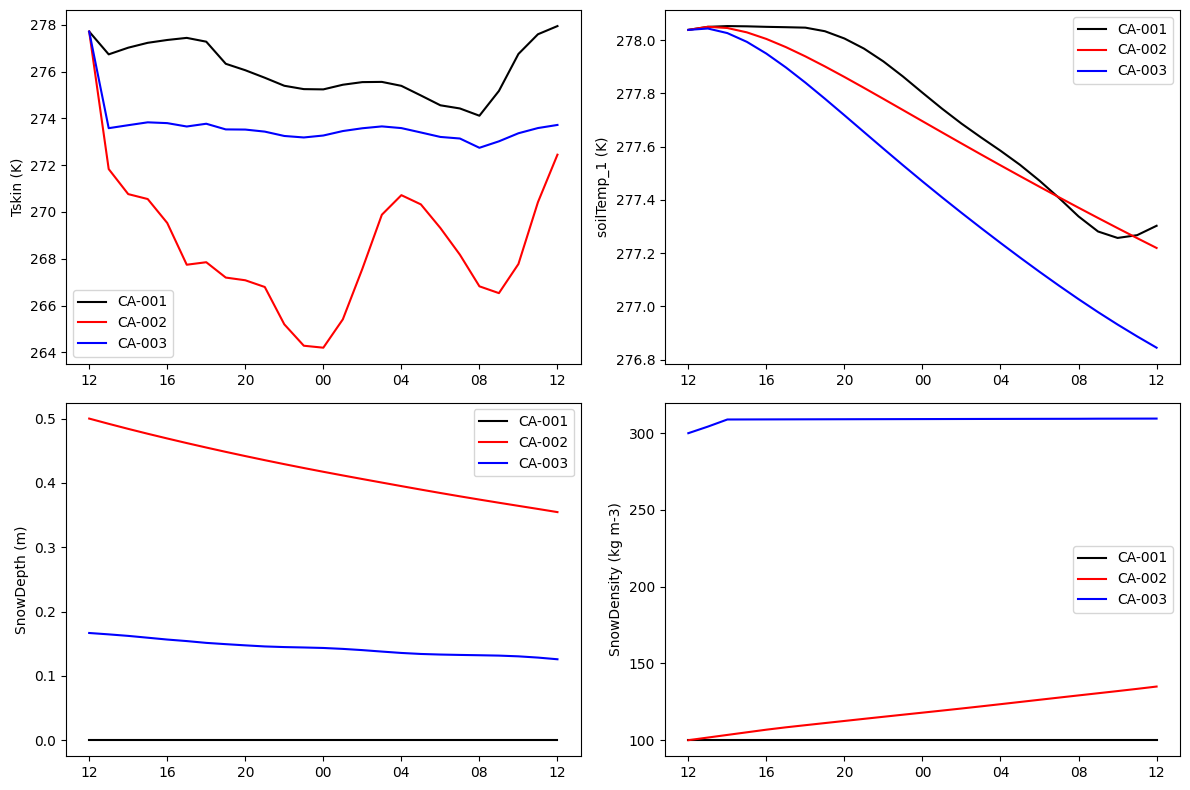

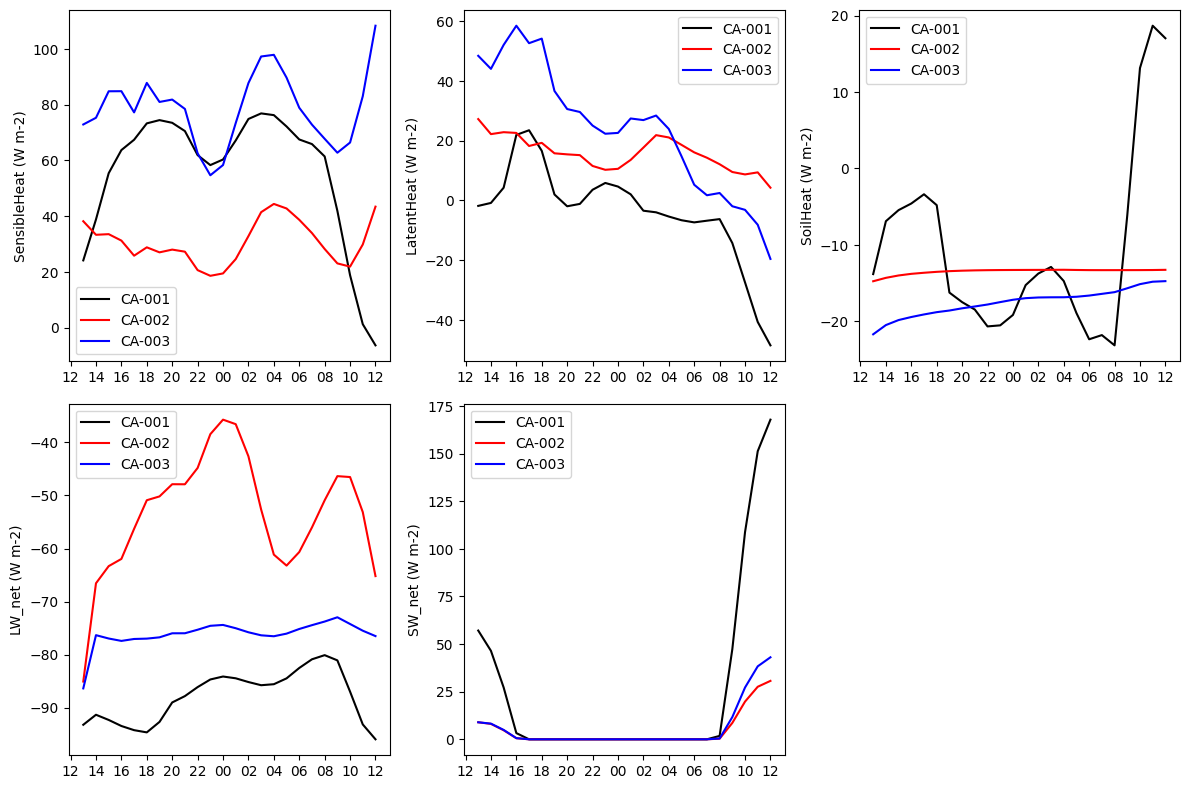

In [9]:
# Plot surface variables

import plot_output
experiments=["CA-001","CA-002","CA-003"]
varplot=["Tskin","soilTemp_1","SnowDepth","SnowDensity"]

plot_output.plot_timeseries(expnames=experiments,
                            expdir="./",
                            plotname='prognostics',
                            plotdir="./",
                            varlist=varplot)
# Plot fluxes
varplot=["SensibleHeat","LatentHeat","SoilHeat","LW_net","SW_net"]
plot_output.plot_timeseries(expnames=experiments,
                            expdir="./",
                            plotname='fluxes',
                            plotdir="./",
                            varlist=varplot)


#  <font color='red'> Questions </font>

In the following questions you are asked to interpret the changes in the snowpack in time, and its effect on the surface energy fluxes and skin and soil temperatures for the different experiments.

<b>a)</b> What happens to the snow depth in experiment (CA-002) and experiment (CA-003) along the ECLand integration? Which snow processes explain the behaviour and differences between experiment CA-002 and experiment CA-003?

<b>b)</b> How do you interpret the changes in skin temperature for the two experiments (CA-002) and (CA-003) compared to the control (CA-001)? Which processes can explain the behaviour? 

<b>c)</b> Between CA-002 and CA-003, hich snow density value leads to a stronger coupling between the atmosphere and the underlying soil during nighttime? How can you diagnose it from the surface energy balance component?

<b>d)</b> How can you interpret the changes in sensible heat fluxes between the three experiments during nighttime? Remember that the flux convention in ECLand is positive downward.

<b>e)</b> What processes could explain the nighttime variability of skin temperature in CA-002 experiment (fresh snow)? We will explore this question in the next Section.


<b> You can write your answers in the cell below, or plot more variables if they can help in your interpretation. </b>

#### 4. The effect of wind on skin temperature and surface fluxes

The experiment with fresh snow ("CA-002") shows a large variation in surface temperature during nighttime.

This could be due to the fact that a surface with a low thermal conductivity and thermal inertia is more responsive to changes in the atmospheric forcing, like turbulence induced winds or the passage of a cloud. We can plot the forcing fields to our experiments to better understand the behaviour of the surface temperature.

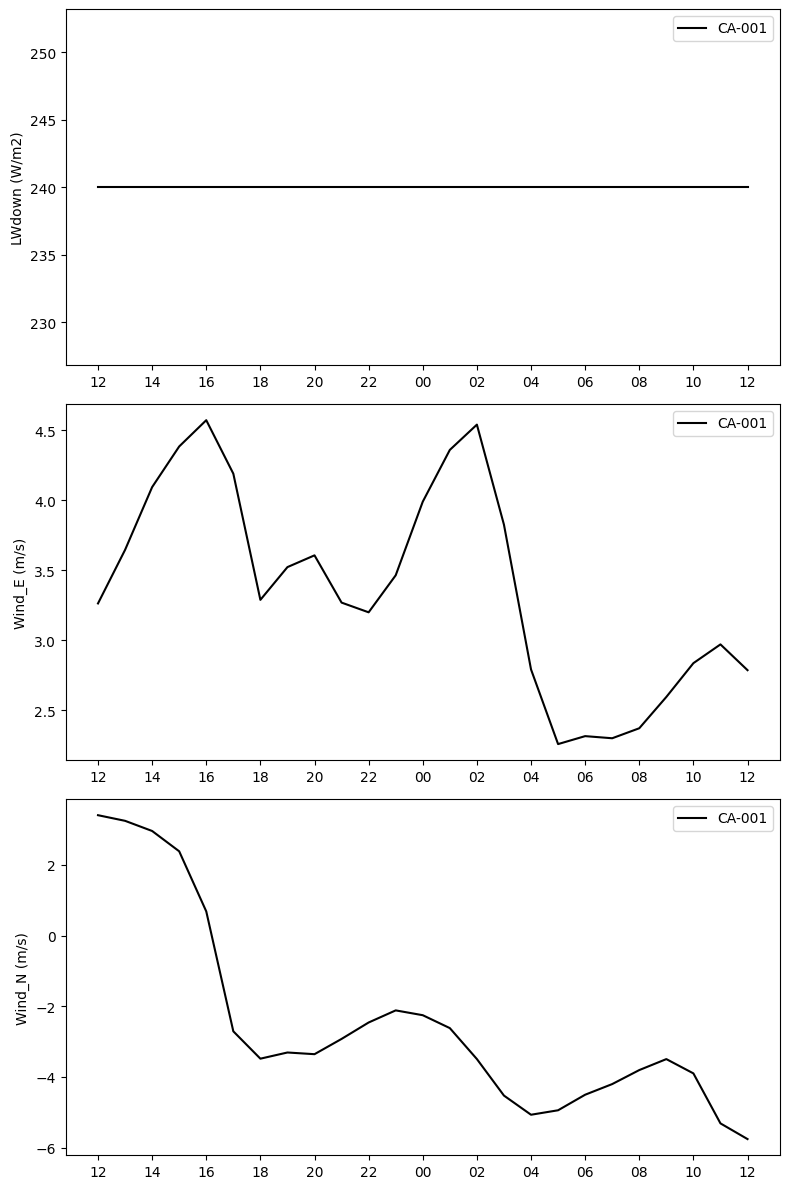

In [10]:
# Plot LWDown and wind components
import plot_output
varlist=["LWdown","Wind_E","Wind_N"]
plot_output.plot_forcing(expnames=["CA-001"],
                         expdir="ecland_input_practicals/forcing/LS-PRACTICALS/",
                         varlist=varlist,
                    )


The previous plots indicate that the downwelling longwave radiation doesn't show a temporaral variability compatible with the skin temperature variability. Wind components on the other hand, show a peak in the longitudinal component at about 02UTC.

To evaluate the impact of wind speed to the skin temperature in the experiment with fresh snow condition, CA-002, we can setup an idealised experiment in which the wind speed is reduced, e.g. by a factor 10. This will represent a clear-sky, calm wind night. This experiment is called "CA-004" and it will be compared to "CA-002" and "CA-001".

This time, to prepare the new forcing, we will modify the forcing file. The methodology is similar as before, using xarray to manipulate the netCDF input file.


In [11]:
# Open forcing file for experiment CA-002 (new snow):
import xarray as xr
ds_Forcing=xr.open_dataset('ecland_input_practicals/forcing/LS-PRACTICALS/met_era5HT_CA-002_2022-2022.nc')
ds_Forcing

<xarray.Dataset>
Dimensions:  (time: 25, lat: 1, lon: 1)
Coordinates:
  * time     (time) datetime64[ns] 2022-01-19T12:00:00 ... 2022-01-20T12:00:00
Dimensions without coordinates: lat, lon
Data variables:
    LWdown   (time, lat, lon) float32 ...
    PSurf    (time, lat, lon) float32 ...
    Qair     (time, lat, lon) float32 ...
    Rainf    (time, lat, lon) float32 ...
    Ctpf     (time, lat, lon) float32 ...
    Snowf    (time, lat, lon) float32 ...
    SWdown   (time, lat, lon) float32 ...
    Tair     (time, lat, lon) float32 ...
    Wind_E   (time, lat, lon) float32 ...
    Wind_N   (time, lat, lon) float32 ...
Attributes:
    CDI:                Climate Data Interface version 2.1.1 (https://mpimet....
    Conventions:        CF-1.6
    Production_time:    Tue 24 Oct 13:55:32 UTC 2023
    Production_source:  ECMWF
    dataset_name:       ECMWF OSM
    version:            1.0
    Contact:            gabriele.arduini@ecmwf.int
    history:            Thu Oct 26 14:19:54 2023: ncap2 -s Rainf(:,:,:)=0.0 m...
    CDO:                Climate Data Operators version 2.1.1 (https://mpimet....
    NCO:                netCDF Operators version 4.9.7 (Homepage = http://nco...

In [12]:
# Modify wind variables. Let's divide by a factor 10 to see the impact on surface coupling:
ds_Forcing_wind_reduced=ds_Forcing.copy(deep=True)

wind_factor=0.1
ds_Forcing_wind_reduced['Wind_E'][:,:,:]=wind_factor*ds_Forcing_wind_reduced['Wind_E'][:,:,:]
ds_Forcing_wind_reduced['Wind_N'][:,:,:]=wind_factor*ds_Forcing_wind_reduced['Wind_N'][:,:,:]



In [13]:
# Write out new experiment forcing. Create also new initial conditions, just copy from CA-002. Those are required to run an experiment.
EXP_NAME='CA-004'
ds_Forcing_wind_reduced.to_netcdf(f'ecland_input_practicals/forcing/LS-PRACTICALS/met_era5HT_{EXP_NAME}_2022-2022.nc')

# Copy surfinit and surfclim from CA-002 to new experiment name:
ds_clim=xr.open_dataset('ecland_input_practicals/clim/LS-PRACTICALS/surfclim_CA-002_2022-2022.nc')
ds_init=xr.open_dataset('ecland_input_practicals/clim/LS-PRACTICALS/surfinit_CA-002_2022-2022.nc')


# Copy surfinit and surfclim from CA-002 to new experiment name.
import shutil
clim = "ecland_input_practicals/clim/LS-PRACTICALS/surfclim_CA-002_2022-2022.nc"
init = "ecland_input_practicals/clim/LS-PRACTICALS/surfinit_CA-002_2022-2022.nc"

clim_copy=f'ecland_input_practicals/clim/LS-PRACTICALS/surfclim_{EXP_NAME}_2022-2022.nc'
init_copy=f'ecland_input_practicals/clim/LS-PRACTICALS/surfinit_{EXP_NAME}_2022-2022.nc'

# Copy with shutil library
shutil.copy(clim, clim_copy)
shutil.copy(init, init_copy)


'ecland_input_practicals/clim/LS-PRACTICALS/surfinit_CA-004_2022-2022.nc'

Now we are ready to run a new experiment, CA-004, where the wind fields have been reduced by a factor 10.

<b> Run ecLand for selected experiment CA-004 </b>

In [ ]:
!./ecland_run_practicals.sh "CA-004" > stdout_004.log

<b> Plot the output </b>

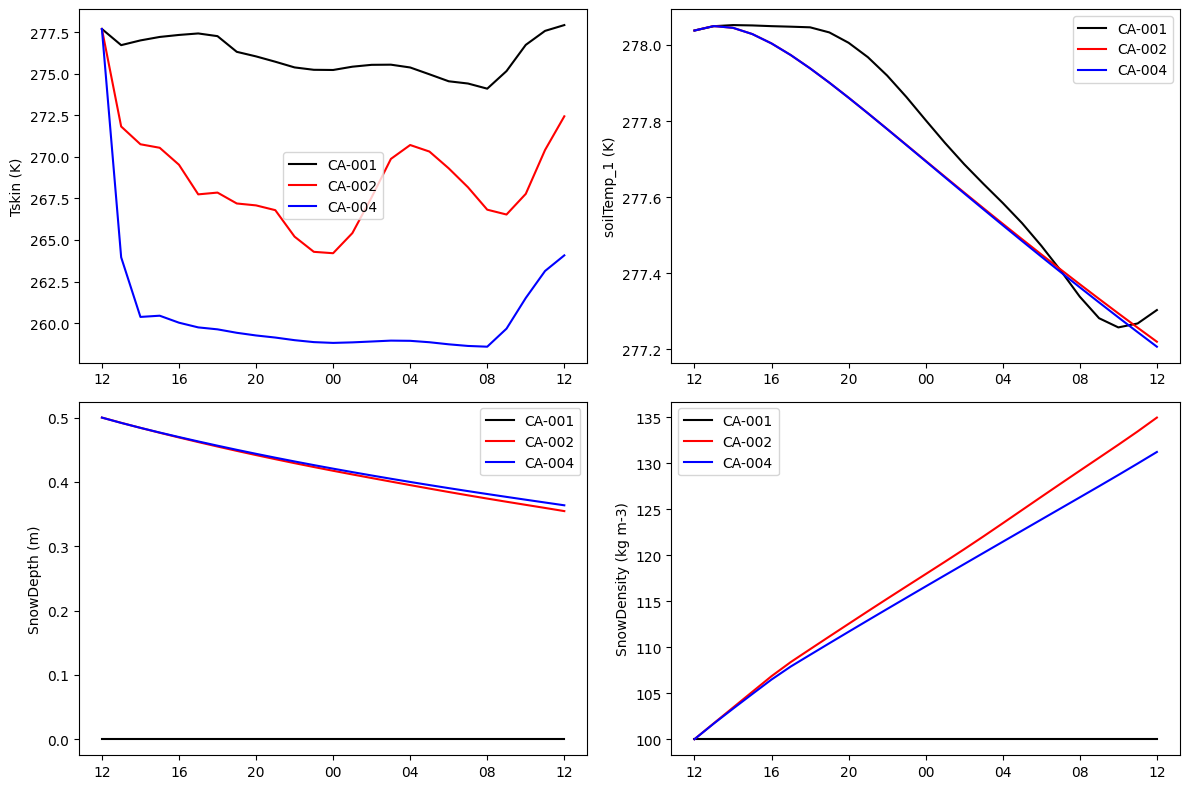

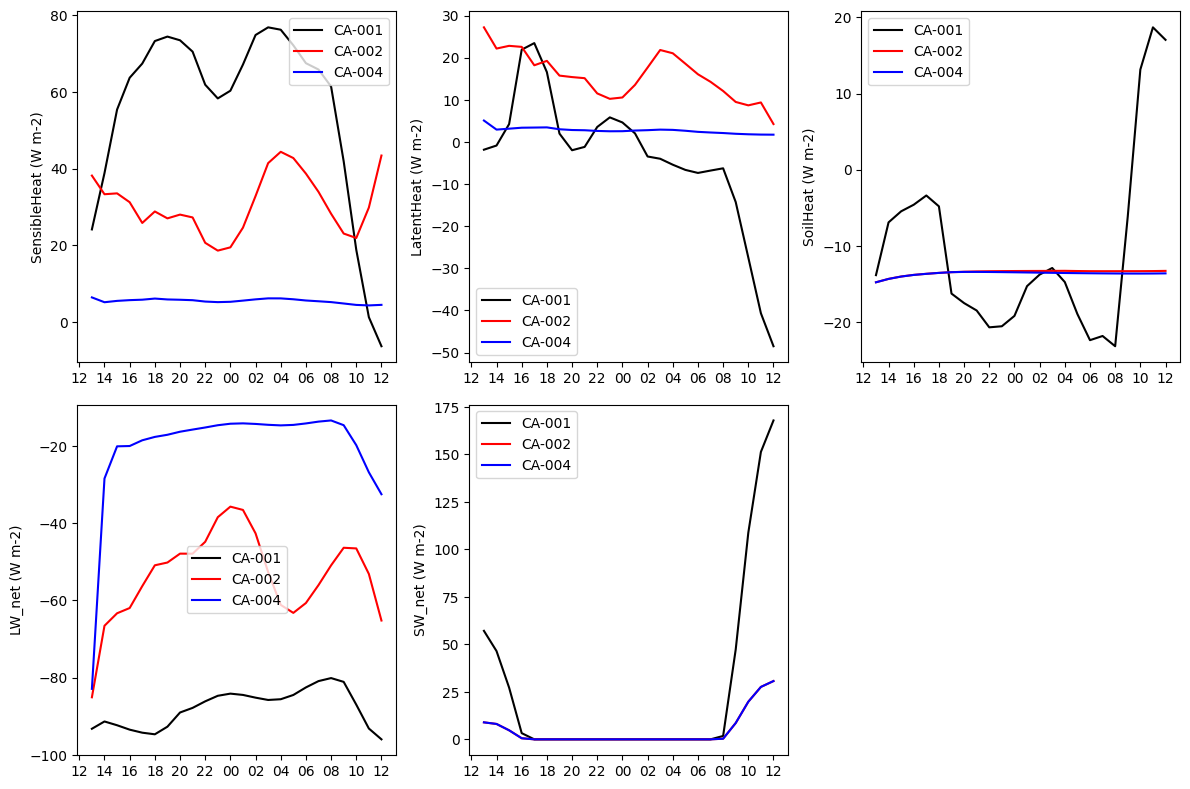

In [15]:
import plot_output

varplot=["Tskin","soilTemp_1","SnowDepth","SnowDensity"]
experiments=["CA-001","CA-002","CA-004"]
plot_output.plot_timeseries(expnames=experiments,
                            expdir="./",
                            plotname='prognostics_1-2-4',
                            plotdir="./",
                            varlist=varplot)

varplot=["SensibleHeat","LatentHeat","SoilHeat","LW_net","SW_net"]
plot_output.plot_timeseries(expnames=experiments,
                            expdir="./",
                            plotname='fluxes_1-2-4',
                            plotdir="./",
                            varlist=varplot)


By reducing the wind speed, "CA-004" shows a strong continuous cooling in the first part of the night, reaching a quasi-equilibrium state around 22UTC.

Skin temperature minima is ~6K colder than "CA-002" experiment, whereas soil temperature only shows a small variation, due to the very effective insulative property of fresh snow.

Sensible and latent heat fluxes are largely reduced and close to zero during nighttime. In terms of fluxes, the system reaches a quasi-equilibrium state in which the net longwave heat loss at the surface is balanced by a steady heat provided by the snow-soil underneath.

# II. Impact of vegetation and soil states


We will now explore the impact of vegetation cover/type and the soil moisture state on the surface-atmosphere interaction. For this part, we ask you first to respond qualitatively to the questions, using the knowledge on the effect of vegetation and soil on surface fluxes and temperature. Then we will run ecLand to evaluate quantitatively your responses.

<b> Questions </b>:

<b>a)</b>	In general the Leaf Area Index (LAI) of high vegetation is higher than that of low vegetation especially during the fully grown season. If a deforestation happens and a needle leaf forest (LAI=5 is typical of a well-developed needle leaf forest) is replaced by a grass and bare ground (assuming undeveloped vegetation having LAI=0.1), what impact would you expect on:

    i) surface fluxes
    ii) skin temperature 
    iii) near surface temperature and dew point

<b>b)</b> A well watered and wet soil can have soil moisture values ~ 0.4 m$^3$ m$^{-3}$. However, after a dry season the soil moisture in the grass field can become very dry, with typical values of soil moisture ~ 0.01 m$^3$ m$^{-3}$. 

    i) What are the implications on the surface fluxes, skin temperature and near-surface temperature and dew point when contrasting these two extreme conditions (i.e. wet and dry soil)?


<b> You can write your answers in the cell below, if you want </b>

### Run ECLand for selected experiments 


#### a. Evaluate impact of change of vegetation state

<b> 1. Grass site with undeveloped vegetation </b>

To evaluate the impact of a change in the vegetation state, we will use the template "VG-000" as a starting point.

This experiment is setup to simulate a short grass site, like Cabauw in the Netherlands. To amplify the impact of vegetation, we can change the LAI value in the input data to ecLand, to the value suggested in Question (a) for undeveloped vegetation.



In [16]:
import xarray as xr

# Open original input condition file and check its content:
EXP_CTL="VG-000"
ds_ctl=xr.open_dataset(f'ecland_input_practicals/clim/LS-PRACTICALS/surfclim_{EXP_CTL}_2022-2022.nc')
ds_ctl

# For the context of this exercise, we are interested in the following variables in the netCDF:
# cvl   : Low vegetation Cover
# cvh   : High vegetation Cover
# Mlail : monthly LAI for Low vegetation
# Mlaih : monthly LAI for High vegetation


<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1, nlevs: 4, ntiles: 9, nvtiles: 2, month: 12)
Coordinates:
  * lat      (lat) float64 51.97
  * lon      (lon) float64 4.927
  * nlevs    (nlevs) float64 0.035 0.175 0.64 1.945
  * ntiles   (ntiles) int32 1 2 3 4 5 6 7 8 9
  * nvtiles  (nvtiles) int32 1 2
  * month    (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables: (12/21)
    Mask     (lat, lon) float64 ...
    z0m      (lat, lon) float64 ...
    zuv      (lat, lon) float64 ...
    zphista  (lat, lon) float64 ...
    lz0h     (lat, lon) float64 ...
    Malbedo  (month, lat, lon) float64 ...
    ...       ...
    tvl      (lat, lon) float64 ...
    tvh      (lat, lon) float64 ...
    sotype   (lat, lon) float64 ...
    sdor     (lat, lon) float64 ...
    CLAKE    (lat, lon) float64 ...
    LDEPTH   (lat, lon) float64 ...
Attributes:
    modelID:             chtessel            
    versionID:           1.1                 
    start_day:           20120101
    start_hour:          0
    SurfSgn_convention:  Mathematical

In [17]:
# Print CVL, CVH, and LAI values (for the month of June):
print(f'cvl={ds_ctl.cvl.data[0][0]},\
    cvh={ds_ctl.cvh.data[0][0]},\
    Mlail June={ds_ctl.Mlail.data[5][0][0]},\
    Mlaih June={ds_ctl.Mlaih.data[5][0][0]},')

cvl=1.0,    cvh=0.0,    Mlail June=2.52344,    Mlaih June=2.42969,


In [18]:
import shutil
import os
# Modify Mlail to represent a site with undeveloped vegetation 
ds_lai_low=ds_ctl.copy(deep=True)

ds_lai_low['Mlail'][:,0,0] = 0.1
ds_lai_low['cvl'][0,0] = 1.0
ds_lai_low['cvh'][0,0] = 0.0

# Write new file changing the experiment name:
EXP_NAME='VG-001' # New experiment id!
#os.remove(f'ecland_input/clim/LS-PRACTICALS/surfclim_{EXP_NAME}_2022-2022.nc')
ds_lai_low.to_netcdf(f'ecland_input_practicals/clim/LS-PRACTICALS/surfclim_{EXP_NAME}_2022-2022.nc',mode='w')

# Copy surfinit and met forcing as these are unchanged, but required by model run, using shutils
init        = f"ecland_input_practicals/clim/LS-PRACTICALS/surfinit_{EXP_CTL}_2022-2022.nc"
forcing     = f"ecland_input_practicals/forcing/LS-PRACTICALS/met_era5HT_{EXP_CTL}_2022-2022.nc"
init_copy   = f'ecland_input_practicals/clim/LS-PRACTICALS/surfinit_{EXP_NAME}_2022-2022.nc'
forcing_copy= f"ecland_input_practicals/forcing/LS-PRACTICALS/met_era5HT_{EXP_NAME}_2022-2022.nc"

# Copy with shutil library
shutil.copy(init, init_copy)
shutil.copy(forcing, forcing_copy)

'ecland_input_practicals/forcing/LS-PRACTICALS/met_era5HT_VG-001_2022-2022.nc'

<b> Run the code for the selected experiment VG-001 </b>

In [ ]:
!./ecland_run_practicals.sh "VG-001" > stdout_VG-001.log

<b> 2. Forest site with well developed vegetation </b>

Similarly, we will edit the input files to represent a forest site (cvh=1.0) with well-developed vegetation state (laih=5.0)

In [20]:
import xarray as xr

# Open original input condition file and check its content:
EXP_CTL="VG-000"
ds_ctl=xr.open_dataset(f'ecland_input_practicals/clim/LS-PRACTICALS/surfclim_{EXP_CTL}_2022-2022.nc')

# For the context of this exercise, we are interested in the following variables in the netCDF:
# cvl   : Low vegetation Cover
# cvh   : High vegetation Cover
# Mlail : monthly LAI for Low vegetation
# Mlaih : monthly LAI for High vegetation


In [21]:
import shutil
import os
# Modify Mlail to represent a site with forest 
ds_lai_high=ds_ctl.copy(deep=True)
# Change the site from a grass to forest
ds_lai_high['cvl'][0,0] = 0.0
ds_lai_high['cvh'][0,0] = 1.0
# Let the vegetation grow!
ds_lai_high['Mlaih'][:,0,0] = 5.0

# Write new file changing the experiment name:
EXP_NAME='VG-002' # New experiment id!
#os.remove(f'ecland_input/clim/LS-PRACTICALS/surfclim_{EXP_NAME}_2022-2022.nc')
ds_lai_high.to_netcdf(f'ecland_input_practicals/clim/LS-PRACTICALS/surfclim_{EXP_NAME}_2022-2022.nc',mode='w')

# Copy surfinit and met forcing as these are unchanged, but required by model run, using shutils
init        = f"ecland_input_practicals/clim/LS-PRACTICALS/surfinit_{EXP_CTL}_2022-2022.nc"
forcing     = f"ecland_input_practicals/forcing/LS-PRACTICALS/met_era5HT_{EXP_CTL}_2022-2022.nc"
init_copy   = f'ecland_input_practicals/clim/LS-PRACTICALS/surfinit_{EXP_NAME}_2022-2022.nc'
forcing_copy= f"ecland_input_practicals/forcing/LS-PRACTICALS/met_era5HT_{EXP_NAME}_2022-2022.nc"

# Copy with shutil library
shutil.copy(init, init_copy)
shutil.copy(forcing, forcing_copy)

'ecland_input_practicals/forcing/LS-PRACTICALS/met_era5HT_VG-002_2022-2022.nc'

You can execute the script in this jupyter notebook (select "terminal" from the "new launcher" button), or within a cell in this Notebook by putting the "!" character at the front of the line:

`!./ecland_run_practicals.sh "VG-002" > stdout_VG-002.log`

The `> stdout.log` syntax redirects the standard output to the text file stdout.log; this avoid a large amount of prints to be displayed in the cell.

<b> Run the code for the selected experiment VG-002 </b>

In [ ]:
!./ecland_run_practicals.sh "VG-002" > stdout_VG-002.log

### Analyse the results

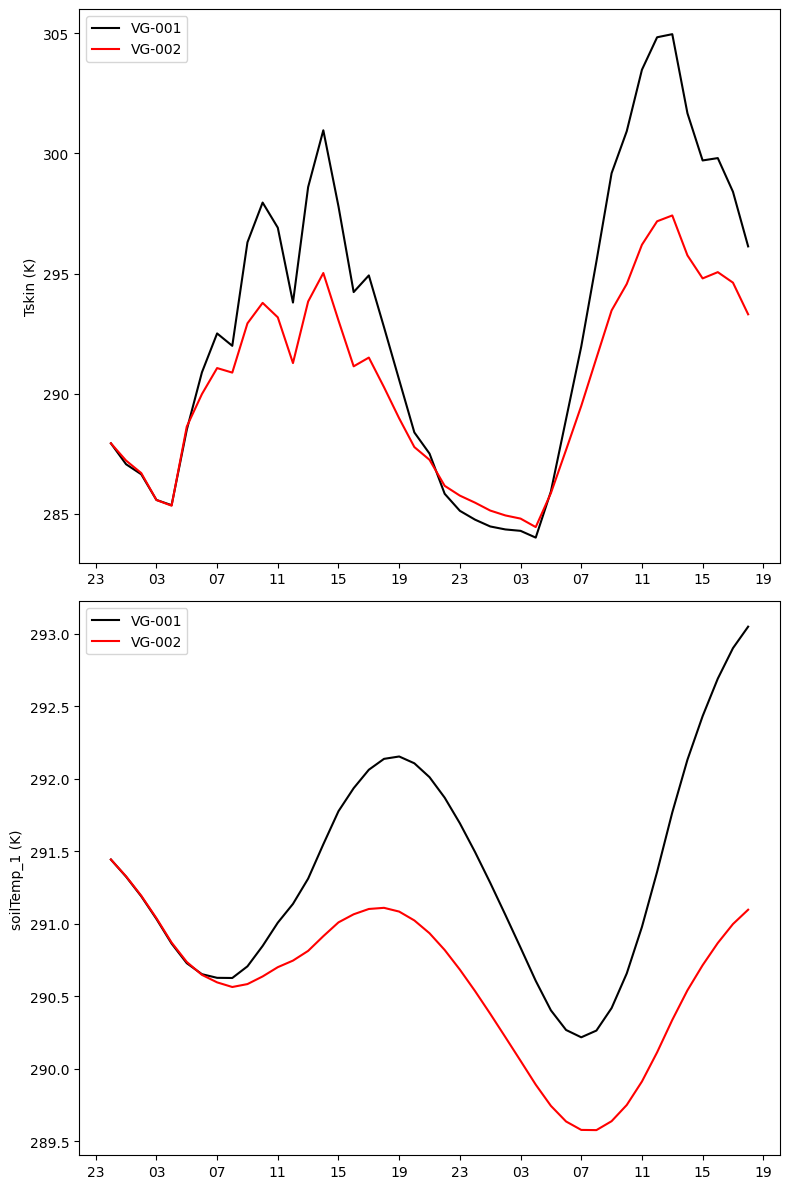

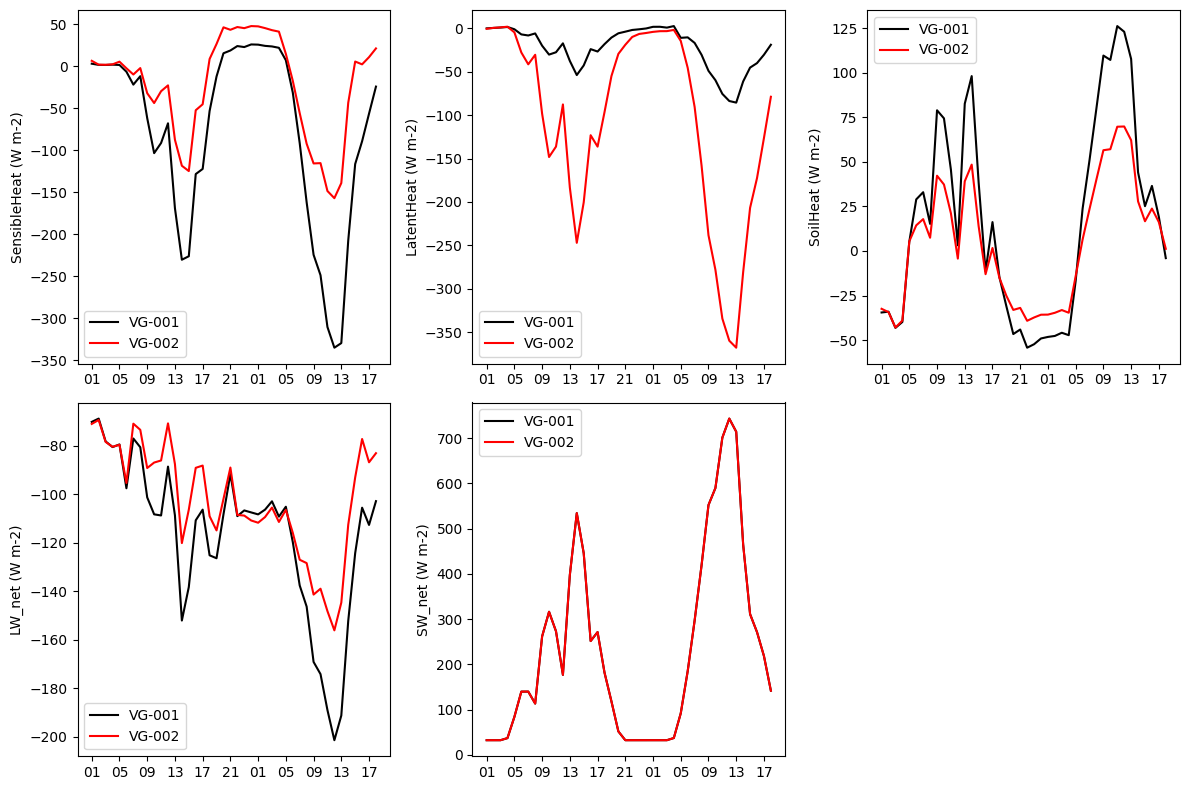

In [23]:
# Plot surface fluxes, skin and soil temperatures
import plot_output

varplot=["Tskin","soilTemp_1"]
experiments=["VG-001","VG-002"]
plot_output.plot_timeseries(expnames=experiments,
                            expdir="./",
                            plotname='prognostics_1-2-4',
                            plotdir="./",
                            varlist=varplot)

varplot=["SensibleHeat","LatentHeat","SoilHeat","LW_net","SW_net"]
plot_output.plot_timeseries(expnames=experiments,
                            expdir="./",
                            plotname='fluxes_1-2-4',
                            plotdir="./",
                            varlist=varplot)


#### b. Evaluate impact of change of soil moisture state

<b> 1. Site with well watered soil </b>

To evaluate the impact of a change in the soil moisture state, we can use again the template "VG-000" as a starting point.

We will create an idealised experiment in which the soil moisture values in initial conditions represent a well-watered case. 



In [24]:
import xarray as xr

# Open original input condition file and check its content:
EXP_CTL="VG-000"
ds_ctl=xr.open_dataset(f'ecland_input_practicals/clim/LS-PRACTICALS/surfinit_{EXP_CTL}_2022-2022.nc')
ds_ctl
# For the context of this exercise, we are interested in the following variables in the netCDF:
# SoilMoist : soil moisture of the 4 soil layers in m3 m-3

<xarray.Dataset>
Dimensions:    (lat: 1, lon: 1, nlevs: 4, ntiles: 9, nvtiles: 2, month: 12,
                time: 1)
Coordinates:
  * lat        (lat) float64 51.97
  * lon        (lon) float64 4.927
  * nlevs      (nlevs) float64 0.035 0.175 0.64 1.945
  * ntiles     (ntiles) int32 1 2 3 4 5 6 7 8 9
  * nvtiles    (nvtiles) int32 1 2
  * month      (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) timedelta64[ns] 00:00:00
Data variables: (12/17)
    step       (time) int32 ...
    CanopInt   (lat, lon) float64 ...
    SoilTemp   (nlevs, lat, lon) float64 ...
    SoilMoist  (nlevs, lat, lon) float64 ...
    icetemp    (nlevs, lat, lon) float64 ...
    SWE        (lat, lon) float64 ...
    ...         ...
    TLMNW      (lat, lon) float64 ...
    TLWML      (lat, lon) float64 ...
    TLBOT      (lat, lon) float64 ...
    TLSF       (lat, lon) float64 ...
    HLICE      (lat, lon) float64 ...
    HLML       (lat, lon) float64 ...
Attributes:
    modelID:             ECLand            
    versionID:           cy48r1                 
    start_day:           20040101
    start_hour:          0
    SurfSgn_convention:  Mathematical

In [25]:
# Print soil moisture values on the different levels:
print(f'soilMoist_lev1={ds_ctl.SoilMoist.data[1][0][0]},\
    soilMoist_lev2={ds_ctl.SoilMoist.data[1][0][0]},\
    soilMoist_lev3={ds_ctl.SoilMoist.data[1][0][0]},\
    soilMoist_lev4={ds_ctl.SoilMoist.data[1][0][0]}')


soilMoist_lev1=0.356559,    soilMoist_lev2=0.356559,    soilMoist_lev3=0.356559,    soilMoist_lev4=0.356559


In [26]:
import shutil
import os
# Modify Soil moisture to represent a site with well watered soil 
ds_moist=ds_ctl.copy(deep=True)
ds_moist['SoilMoist'][:,0,0] = 0.4

# Write new file changing the experiment name:
EXP_NAME='SM-001' # New experiment id!
#os.remove(f'ecland_input/clim/LS-PRACTICALS/surfinit_{EXP_NAME}_2022-2022.nc')
ds_moist.to_netcdf(f'ecland_input_practicals/clim/LS-PRACTICALS/surfinit_{EXP_NAME}_2022-2022.nc',mode='w')

# Copy surfinit and met forcing as these are unchanged, but required by model run, using shutils
clim        = f"ecland_input_practicals/clim/LS-PRACTICALS/surfclim_{EXP_CTL}_2022-2022.nc"
forcing     = f"ecland_input_practicals/forcing/LS-PRACTICALS/met_era5HT_{EXP_CTL}_2022-2022.nc"
clim_copy   = f'ecland_input_practicals/clim/LS-PRACTICALS/surfclim_{EXP_NAME}_2022-2022.nc'
forcing_copy= f"ecland_input_practicals/forcing/LS-PRACTICALS/met_era5HT_{EXP_NAME}_2022-2022.nc"

# Copy with shutil library
shutil.copy(clim, clim_copy)
shutil.copy(forcing, forcing_copy)

'ecland_input_practicals/forcing/LS-PRACTICALS/met_era5HT_SM-001_2022-2022.nc'

<b> Run the code for the selected experiment SM-001 </b>

In [ ]:
!./ecland_run_practicals.sh "SM-001" > stdout_SM-001.log



<b> 2. Site in draught conditions </b>

As in previous examples, we will edit the input files to represent a site under draught conditions (exp `"SM-002"`)

In [28]:
import xarray as xr

# Open original input condition file and check its content:
EXP_CTL="VG-000"
ds_ctl=xr.open_dataset(f'ecland_input_practicals/clim/LS-PRACTICALS/surfinit_{EXP_CTL}_2022-2022.nc')
# For the context of this exercise, we are interested in the following variables in the netCDF:
# SoilMoist : soil moisture of the 4 soil layers in m3 m-3

import shutil
import os
# Modify Soil moisture to represent a site with well watered soil 
ds_draught=ds_ctl.copy(deep=True)
ds_draught['SoilMoist'][:,0,0] = 0.01

# Write new file changing the experiment name:
EXP_NAME='SM-002' # New experiment id!
#os.remove(f'ecland_input/clim/LS-PRACTICALS/surfinit_{EXP_NAME}_2022-2022.nc')
ds_draught.to_netcdf(f'ecland_input_practicals/clim/LS-PRACTICALS/surfinit_{EXP_NAME}_2022-2022.nc',mode='w')

# Copy surfinit and met forcing as these are unchanged, but required by model run, using shutils
clim        = f"ecland_input_practicals/clim/LS-PRACTICALS/surfclim_{EXP_CTL}_2022-2022.nc"
forcing     = f"ecland_input_practicals/forcing/LS-PRACTICALS/met_era5HT_{EXP_CTL}_2022-2022.nc"
clim_copy   = f'ecland_input_practicals/clim/LS-PRACTICALS/surfclim_{EXP_NAME}_2022-2022.nc'
forcing_copy= f"ecland_input_practicals/forcing/LS-PRACTICALS/met_era5HT_{EXP_NAME}_2022-2022.nc"

# Copy with shutil library
shutil.copy(clim, clim_copy)
shutil.copy(forcing, forcing_copy)

'ecland_input_practicals/forcing/LS-PRACTICALS/met_era5HT_SM-002_2022-2022.nc'

<b> Run the code for the selected experiment SM-002 </b>

In [ ]:
!./ecland_run_practicals.sh "SM-002" > stdout_SM-002.log

### Analyse the results

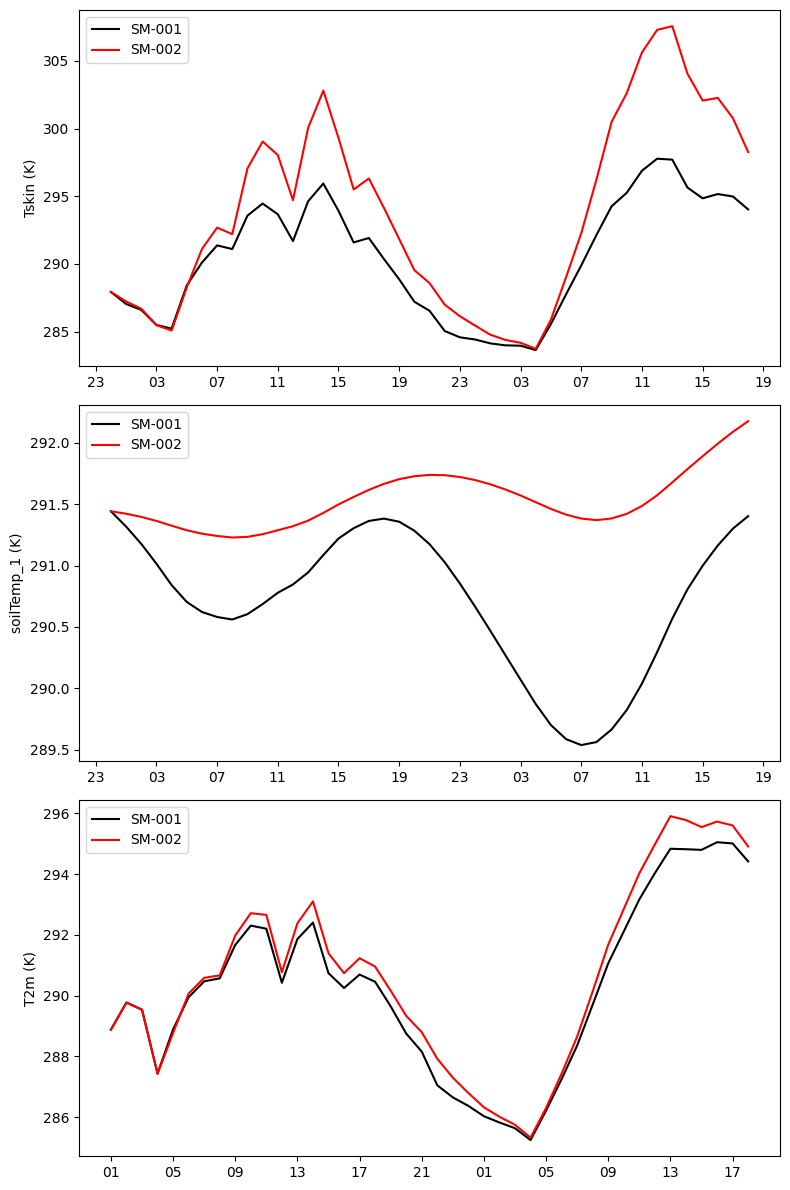

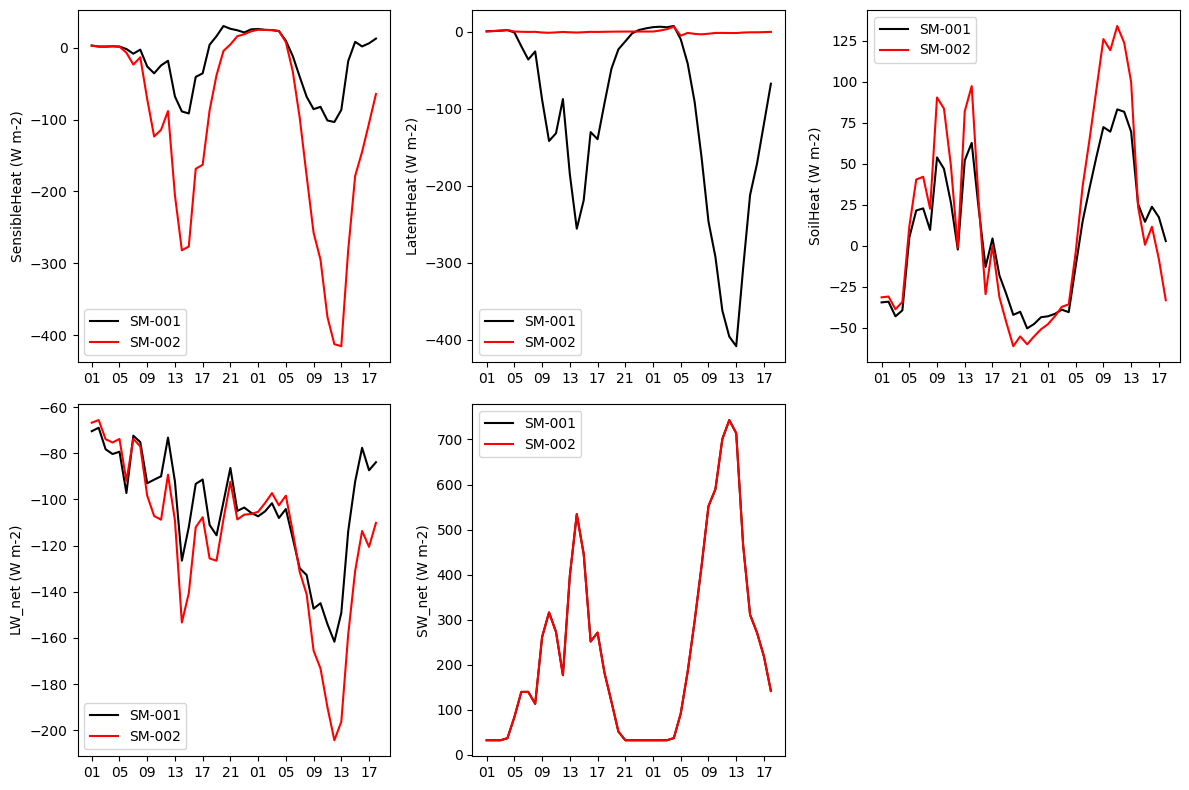

In [30]:
# Plot surface fluxes, skin temperature
import plot_output

varplot=["Tskin","soilTemp_1", "T2m"]
experiments=["SM-001","SM-002"]
plot_output.plot_timeseries(expnames=experiments,
                            expdir="./",
                            plotname='prognostics_1-2-4',
                            plotdir="./",
                            varlist=varplot)

varplot=["SensibleHeat","LatentHeat","SoilHeat","LW_net","SW_net"]
plot_output.plot_timeseries(expnames=experiments,
                            expdir="./",
                            plotname='fluxes_1-2-4',
                            plotdir="./",
                            varlist=varplot)


#### Extra question: Why do you see different latent heat fluxes between the first and the second day?

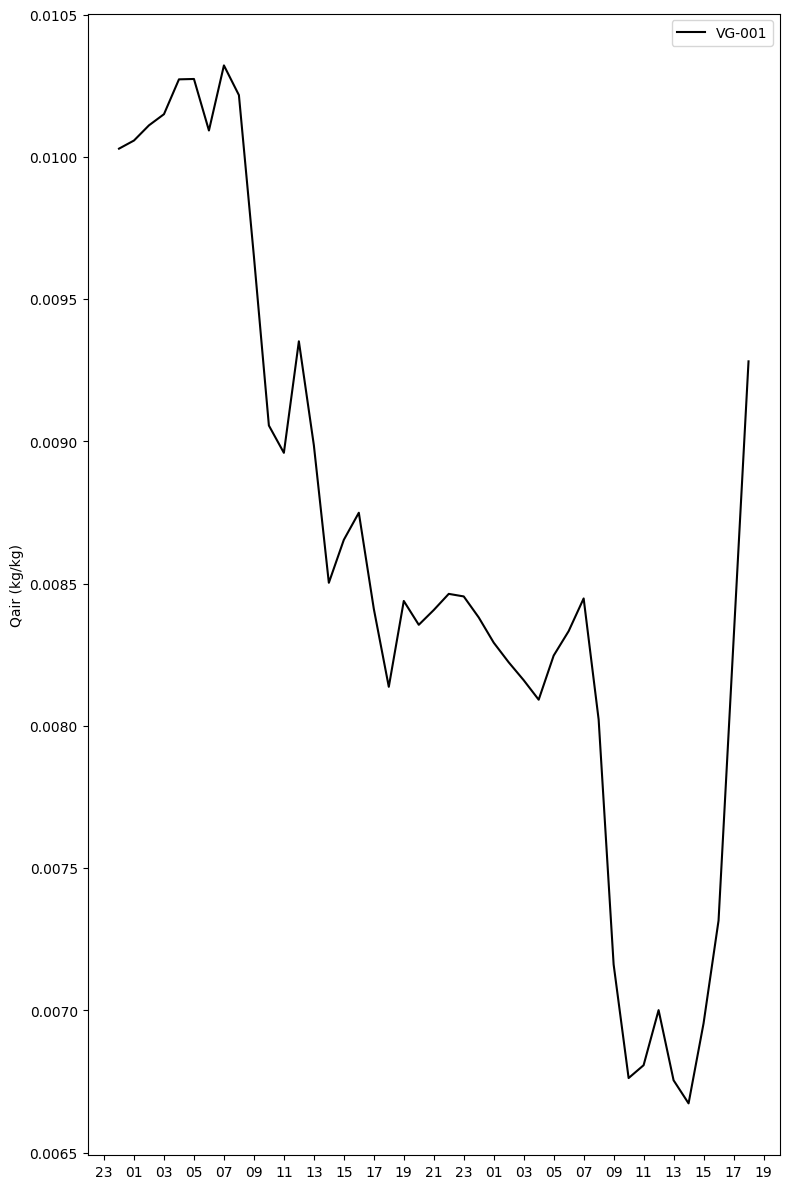

In [31]:
# Plot humidity forcing, maybe there is a hint in there...
import plot_output
varlist=["Qair"]
plot_output.plot_forcing(expnames=["VG-001"],
                         expdir="ecland_input_practicals/forcing/LS-PRACTICALS/",
                         varlist=varlist,
                    )